In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from google.colab import files
uploaded = files.upload()

In [6]:
df=pd.read_csv("./dataset/cardio_train.csv",  delimiter=';')

In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
x = df[features]
y = df['cardio']

In [18]:
x = pd.DataFrame(StandardScaler().fit_transform(x))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [19]:
parameters = {'solver':['newton-cg', 'liblinear'],'random_state':[42]}
model_LogisticRegression = LogisticRegression()
model_mrl_LogisticRegression = GridSearchCV(model_LogisticRegression, parameters,cv=3,verbose=2, n_jobs=-1)
model_mrl_LogisticRegression.fit(x_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'random_state': [42],
                         'solver': ['newton-cg', 'liblinear']},
             verbose=2)

In [20]:
parameters = {'n_estimators':[10,12,15,20],'max_depth':[4,6,8,9],'random_state':[42]}
rf_model = RandomForestClassifier()
model_mrl_RandomForestClassifier = GridSearchCV(rf_model, parameters,cv=3,verbose=2,n_jobs=-1)
model_mrl_RandomForestClassifier.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 9],
                         'n_estimators': [10, 12, 15, 20],
                         'random_state': [42]},
             verbose=2)

In [21]:
model_mrl_HistGradientBoostingClassifier = HistGradientBoostingClassifier(max_bins=10, learning_rate=0.6)
model_mrl_HistGradientBoostingClassifier.fit(x_train, y_train)

HistGradientBoostingClassifier(learning_rate=0.6, max_bins=10)

In [46]:
parameters = {"kernel": ['rbf','linear','poly']}
model_SVM = svm.SVC(probability=True)
model_mrl_SVM = GridSearchCV(model_SVM, parameters,cv=3,verbose=2,n_jobs =-1)
model_mrl_SVM.fit(x_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'linear', 'poly']}, verbose=2)

In [23]:
model_mrl_GaussianNB = GaussianNB()
model_mrl_GaussianNB.fit(x_train, y_train)

GaussianNB()

In [24]:
parameters = {'n_estimators':[5,10,15,20],'max_depth':[2,4,6],'objective': ['binary:logistic','reg:logistic','count:poisson','rank:pairwise'],'random_state':[42]}
model_XGBClassifier = XGBClassifier()
model_mrl_XGBClassifier = GridSearchCV(model_XGBClassifier, parameters,cv=3,verbose=2, n_jobs=-1)
model_mrl_XGBClassifier.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'n_estimators': [5, 10, 15, 20],
                         'objective': ['binary:logistic', 'reg:logistic',
                                       'count:poisson', 'rank:pairwise'],
                         'random_state': [42]},
             verbose=2)

In [65]:
y_pred_LogisticRegression = model_mrl_LogisticRegression.predict(x_test)
y_pred_proba_LogisticRegression = model_mrl_LogisticRegression.predict_proba(x_test)

y_pred_RandomForestClassifier = model_mrl_RandomForestClassifier.predict(x_test)
y_pred_proba_RandomForestClassifier = model_mrl_RandomForestClassifier.predict_proba(x_test)

y_pred_HistGradientBoostingClassifier = model_mrl_HistGradientBoostingClassifier.predict(x_test)
y_pred_proba_HistGradientBoostingClassifier = model_mrl_HistGradientBoostingClassifier.predict_proba(x_test)

y_pred_SVM = model_mrl_SVM.predict(x_test)
y_pred_proba_SVM = model_mrl_SVM.predict_proba(x_test)

y_pred_GaussianNB = model_mrl_GaussianNB.predict(x_test)
y_pred_proba_GaussianNB = model_mrl_GaussianNB.predict_proba(x_test)

y_pred_XGBClassifier = model_mrl_XGBClassifier.predict(x_test)
y_pred_proba_XGBClassifier = model_mrl_XGBClassifier.predict_proba(x_test)

In [30]:
from keras.regularizers import l2
from ann_visualizer.visualize import ann_viz

model = Sequential()
model.add(Dense(11, input_dim=11, activation='relu', kernel_regularizer=l2(0.2)))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() 

ann_viz(model)

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100, verbose=2)

model.save("model.h5")
print("Saved model to disk")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1532/1532 - 10s - loss: 0.8813 - accuracy: 0.6386 - val_loss: 0.6310 - val_accuracy: 0.6579 - 10s/epoch - 7ms/step
Epoch 2/100
1532/1532 - 7s - loss: 0.6298 - accuracy: 0.6577 - val_loss: 0.6201 - val_accuracy: 0.6680 - 7s/epoch - 5ms/step
Epoch 3/100
1532/1532 - 7s - loss: 0.6226 - accuracy: 0.6717 - val_l

In [99]:
y_pred_proba_DNN = model.predict(x_test)

n = 0
y_pred_DNN = y_pred_proba_DNN.copy()
for r in y_pred_proba_DNN:
  if y_pred_DNN[n][0] < 0.5:
    y_pred_DNN[n][0] = 0
  else:
    y_pred_DNN[n][0] = 1
  n = n+1

print("Accuracy Deep Neural Network: ", accuracy_score(y_test, y_pred_DNN))
print("Accuracy Logistic Regression: ", accuracy_score(y_test, y_pred_LogisticRegression))
print("Accuracy Random Forest Classifier: ", accuracy_score(y_test, y_pred_RandomForestClassifier))
print("Accuracy Histogram-based Gradient Boosting Classifier: ", accuracy_score(y_test, y_pred_HistGradientBoostingClassifier))
print("Accuracy Support Vector Machine: ", accuracy_score(y_test, y_pred_SVM))
print("Accuracy Gaussian Naive Bayes: ", accuracy_score(y_test, y_pred_GaussianNB))
print("Accuracy XGBoost Classifier: ", accuracy_score(y_test, y_pred_XGBClassifier))


Accuracy Deep Neural Network:  0.7301428571428571
Accuracy Logistic Regression:  0.7199047619047619
Accuracy Random Forest Classifier:  0.736904761904762
Accuracy Histogram-based Gradient Boosting Classifier:  0.7368095238095238
Accuracy Support Vector Machine:  0.7295238095238096
Accuracy Gaussian Naive Bayes:  0.5944285714285714
Accuracy XGBoost Classifier:  0.738904761904762


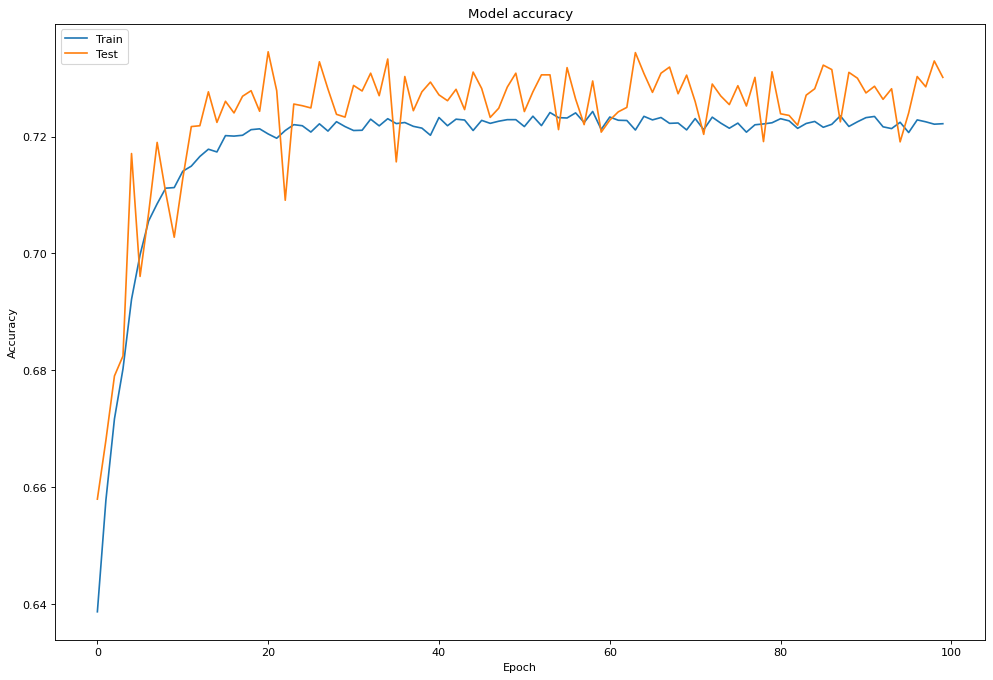

In [100]:
figure(figsize=(15, 10), dpi=80)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

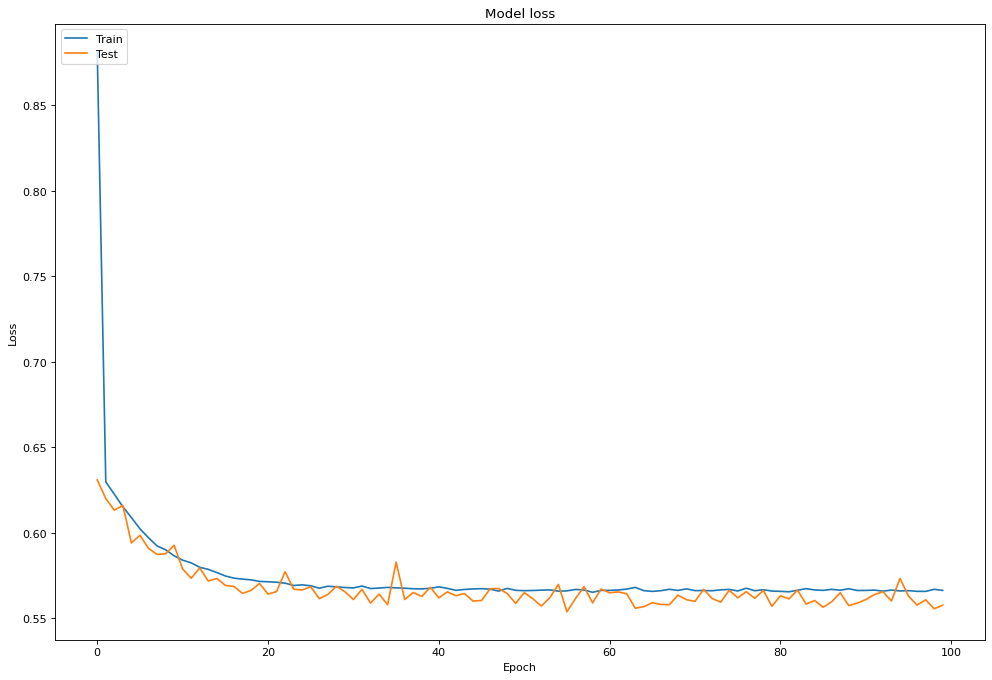

<Figure size 640x480 with 0 Axes>

In [101]:
figure(figsize=(15, 10), dpi=80)
fig1 = plt.gcf()

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()
plt.draw()

In [102]:
y_pred_proba_LogisticRegression_reshape = y_pred_proba_LogisticRegression[:, 1]
y_pred_proba_RandomForestClassifier_reshape = y_pred_proba_RandomForestClassifier[:, 1]
y_pred_proba_HistGradientBoostingClassifier_reshape = y_pred_proba_HistGradientBoostingClassifier[:, 1]
y_pred_proba_SVM_reshape = y_pred_proba_SVM[:, 1]
y_pred_proba_GaussianNB_reshape = y_pred_proba_GaussianNB[:, 1]
y_pred_proba_XGBClassifier_reshape = y_pred_proba_XGBClassifier[:, 1]

Auc Deep Neural Network:  0.7953122645800855
Auc Logistic Regression:  0.7846769659289358
Auc Random Forest Classifier:  0.8031088619372245
Auc Histogram-based Gradient Boosting Classifier:  0.7997687387596522
Auc Support Vector Machine:  0.7901642661210773
Auc Gaussian Naive Bayes:  0.6888050854651699
Auc XGBoost Classifier:  0.8047648122202212


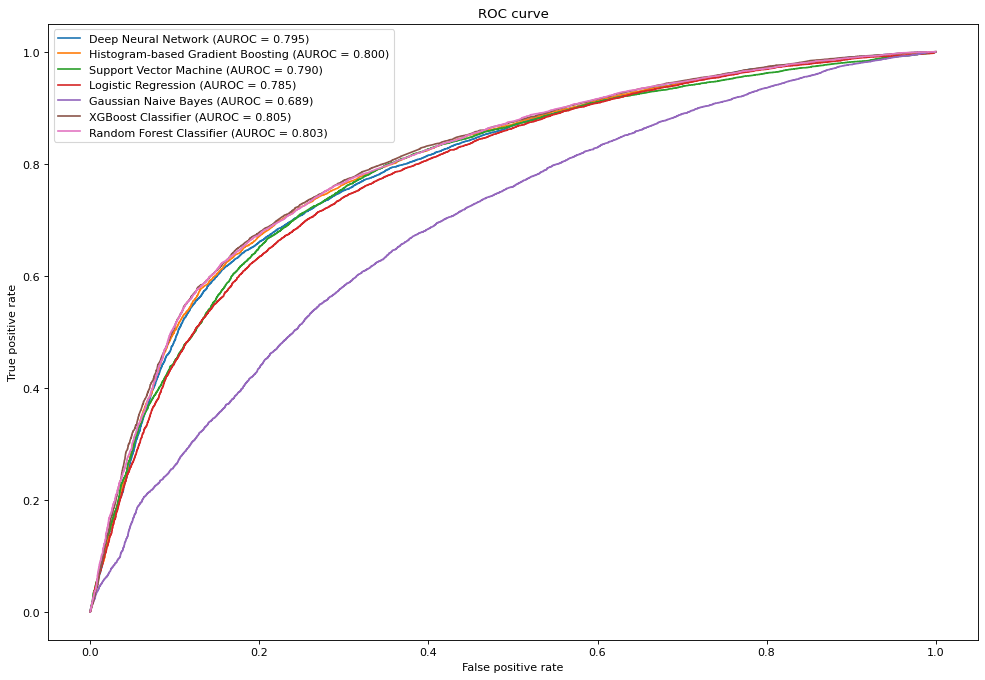

In [103]:
fpr_rf_LogisticRegression, tpr_rf_LogisticRegression, thresholds_rf_LogisticRegression = roc_curve(y_test, y_pred_proba_LogisticRegression_reshape)
fpr_rf_RandomForestClassifier, tpr_rf_RandomForestClassifier, thresholds_rf__RandomForestClassifier = roc_curve(y_test, y_pred_proba_RandomForestClassifier_reshape)
fpr_rf_HistGradientBoostingClassifier, tpr_rf_HistGradientBoostingClassifier, thresholds_rf_HistGradientBoostingClassifier = roc_curve(y_test, y_pred_proba_HistGradientBoostingClassifier_reshape)
fpr_rf_SVM, tpr_rf_SVM, thresholds_rf_SVM = roc_curve(y_test, y_pred_proba_SVM_reshape)
fpr_rf_GaussianNB, tpr_rf_GaussianNB, thresholds_rf_GaussianNB = roc_curve(y_test, y_pred_proba_GaussianNB_reshape)
fpr_rf_XGBClassifier, tpr_rf_XGBClassifier, thresholds_rf_XGBClassifier = roc_curve(y_test, y_pred_proba_XGBClassifier_reshape)
fpr_rf_neural_network, tpr_rf_neural_network, thresholds_rf_neural_network = roc_curve(y_test, y_pred_proba_DNN)

auc_rf_LogisticRegression = auc(fpr_rf_LogisticRegression, tpr_rf_LogisticRegression)
auc_rf_RandomForestClassifier = auc(fpr_rf_RandomForestClassifier, tpr_rf_RandomForestClassifier)
auc_rf_HistGradientBoostingClassifier = auc(fpr_rf_HistGradientBoostingClassifier, tpr_rf_HistGradientBoostingClassifier)
auc_rf_SVM = auc(fpr_rf_SVM, tpr_rf_SVM)
auc_rf_GaussianNB = auc(fpr_rf_GaussianNB, tpr_rf_GaussianNB)
auc_rf_XGBClassifier = auc(fpr_rf_XGBClassifier, tpr_rf_XGBClassifier)
auc_rf_neural_network = auc(fpr_rf_neural_network, tpr_rf_neural_network)

print("Auc Deep Neural Network: ", auc_rf_neural_network)
print("Auc Logistic Regression: ", auc_rf_LogisticRegression)
print("Auc Random Forest Classifier: ", auc_rf_RandomForestClassifier)
print("Auc Histogram-based Gradient Boosting Classifier: ", auc_rf_HistGradientBoostingClassifier)
print("Auc Support Vector Machine: ", auc_rf_SVM)
print("Auc Gaussian Naive Bayes: ", auc_rf_GaussianNB)
print("Auc XGBoost Classifier: ", auc_rf_XGBClassifier)

figure(figsize=(15, 10), dpi=80)
fig1 = plt.gcf()

plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_neural_network, tpr_rf_neural_network, label='Deep Neural Network (AUROC = {:.3f})'.format(auc_rf_neural_network))
plt.plot(fpr_rf_HistGradientBoostingClassifier, tpr_rf_HistGradientBoostingClassifier, label='Histogram-based Gradient Boosting (AUROC = {:.3f})'.format(auc_rf_HistGradientBoostingClassifier))
plt.plot(fpr_rf_SVM, tpr_rf_SVM, label='Support Vector Machine (AUROC = {:.3f})'.format(auc_rf_SVM))
plt.plot(fpr_rf_LogisticRegression, tpr_rf_LogisticRegression, label='Logistic Regression (AUROC = {:.3f})'.format(auc_rf_LogisticRegression))
plt.plot(fpr_rf_GaussianNB, tpr_rf_GaussianNB, label='Gaussian Naive Bayes (AUROC = {:.3f})'.format(auc_rf_GaussianNB))
plt.plot(fpr_rf_XGBClassifier, tpr_rf_XGBClassifier, label='XGBoost Classifier (AUROC = {:.3f})'.format(auc_rf_XGBClassifier))
plt.plot(fpr_rf_RandomForestClassifier, tpr_rf_RandomForestClassifier, label='Random Forest Classifier (AUROC = {:.3f})'.format(auc_rf_RandomForestClassifier))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [104]:
fpr_rf_LogisticRegression, tpr_rf_LogisticRegression, thresholds_rf_LogisticRegression = roc_curve(y_test, y_pred_proba_LogisticRegression_reshape)
fpr_rf_RandomForestClassifier, tpr_rf_RandomForestClassifier, thresholds_rf__RandomForestClassifier = roc_curve(y_test, y_pred_proba_RandomForestClassifier_reshape)
fpr_rf_HistGradientBoostingClassifier, tpr_rf_HistGradientBoostingClassifier, thresholds_rf_HistGradientBoostingClassifier = roc_curve(y_test, y_pred_proba_HistGradientBoostingClassifier_reshape)
fpr_rf_SVM, tpr_rf_SVM, thresholds_rf_SVM = roc_curve(y_test, y_pred_proba_SVM_reshape)
fpr_rf_GaussianNB, tpr_rf_GaussianNB, thresholds_rf_GaussianNB = roc_curve(y_test, y_pred_proba_GaussianNB_reshape)
fpr_rf_XGBClassifier, tpr_rf_XGBClassifier, thresholds_rf_XGBClassifier = roc_curve(y_test, y_pred_proba_XGBClassifier_reshape)
fpr_rf_neural_network, tpr_rf_neural_network, thresholds_rf_neural_network = roc_curve(y_test, y_pred_proba_DNN)

lr_precision_LogisticRegression, lr_recall_LogisticRegression, _ = precision_recall_curve(y_test, y_pred_proba_LogisticRegression_reshape)
lr_precision_RandomForestClassifier, lr_recall_RandomForestClassifier, _ = precision_recall_curve(y_test, y_pred_proba_RandomForestClassifier_reshape)
lr_precision_HistGradientBoostingClassifier, lr_recall_HistGradientBoostingClassifier, _ = precision_recall_curve(y_test, y_pred_proba_HistGradientBoostingClassifier_reshape)
lr_precision_SVM, lr_recall_SVM, _ = precision_recall_curve(y_test, y_pred_proba_SVM_reshape)
lr_precision_GaussianNB, lr_recall_GaussianNB, _ = precision_recall_curve(y_test, y_pred_proba_GaussianNB_reshape)
lr_precision_XGBClassifier, lr_recall_XGBClassifier, _ = precision_recall_curve(y_test, y_pred_proba_XGBClassifier_reshape)
lr_precision_Deep, lr_recall_Deep, _ = precision_recall_curve(y_test, y_pred_proba_DNN)

tn_LogisticRegression, fp_LogisticRegression, fn_LogisticRegression, tp_LogisticRegression = confusion_matrix(y_test, y_pred_LogisticRegression).ravel()
tn_RandomForestClassifie, fp_RandomForestClassifie, fn_RandomForestClassifie, tp_RandomForestClassifie = confusion_matrix(y_test, y_pred_RandomForestClassifier).ravel()
tn_HistGradientBoostingClassifier, fp_HistGradientBoostingClassifier, fn_HistGradientBoostingClassifier, tp_HistGradientBoostingClassifier = confusion_matrix(y_test, y_pred_HistGradientBoostingClassifier).ravel()
tn_SVM, fp_SVM, fn_SVM, tp_SVM = confusion_matrix(y_test, y_pred_SVM).ravel()
tn_GaussianNB, fp_GaussianNB, fn_GaussianNB, tp_GaussianNB = confusion_matrix(y_test, y_pred_GaussianNB).ravel()
tn_XGBClassifier, fp_XGBClassifier, fn_XGBClassifier, tp_XGBClassifier = confusion_matrix(y_test, y_pred_XGBClassifier).ravel()
tn_Deep, fp_Deep, fn_Deep, tp_Deep = confusion_matrix(y_test, y_pred_DNN).ravel()

precision_score_LogisticRegression = tp_LogisticRegression / (tp_LogisticRegression + fp_LogisticRegression)
recall_score_LogisticRegression = tp_LogisticRegression / (tp_LogisticRegression + fn_LogisticRegression)
specificity_LogisticRegression = tn_LogisticRegression / (tn_LogisticRegression + fp_LogisticRegression)
f1_LogisticRegression = 2*(recall_score_LogisticRegression * precision_score_LogisticRegression) / (recall_score_LogisticRegression + precision_score_LogisticRegression)

precision_score_RandomForestClassifier = tp_RandomForestClassifie / (tp_RandomForestClassifie + fp_RandomForestClassifie)
recall_score_RandomForestClassifier = tp_RandomForestClassifie / (tp_RandomForestClassifie + fn_RandomForestClassifie)
specificity_RandomForestClassifier = tn_RandomForestClassifie / (tn_RandomForestClassifie + fp_RandomForestClassifie)
f1_RandomForestClassifier = 2 * (recall_score_RandomForestClassifier * precision_score_RandomForestClassifier) / (recall_score_RandomForestClassifier + precision_score_RandomForestClassifier)

precision_score_HistGradientBoostingClassifier = tp_HistGradientBoostingClassifier / (tp_HistGradientBoostingClassifier + fp_HistGradientBoostingClassifier)
recall_score_HistGradientBoostingClassifier = tp_HistGradientBoostingClassifier / (tp_HistGradientBoostingClassifier + fn_HistGradientBoostingClassifier)
specificity_HistGradientBoostingClassifier = tn_HistGradientBoostingClassifier / (tn_HistGradientBoostingClassifier + fp_HistGradientBoostingClassifier)
f1_HistGradientBoostingClassifier = 2 * (recall_score_HistGradientBoostingClassifier * precision_score_HistGradientBoostingClassifier) / (recall_score_HistGradientBoostingClassifier + precision_score_HistGradientBoostingClassifier)

precision_score_SVM = tp_SVM / (tp_SVM + fp_SVM)
recall_score_SVM = tp_SVM / (tp_SVM + fn_SVM)
specificity_SVM = tn_SVM / (tn_SVM + fp_SVM)
f1_SVM = 2 * (recall_score_SVM * precision_score_SVM) / (recall_score_SVM + precision_score_SVM)

precision_score_GaussianNB = tp_GaussianNB / (tp_GaussianNB + fp_GaussianNB)
recall_score_GaussianNB = tp_GaussianNB / (tp_GaussianNB + fn_GaussianNB)
specificity_GaussianNB = tn_GaussianNB / (tn_GaussianNB + fp_GaussianNB)
f1_GaussianNB = 2 * (recall_score_GaussianNB * precision_score_GaussianNB) / (recall_score_GaussianNB + precision_score_GaussianNB)

precision_score_XGBClassifier = tp_XGBClassifier / (tp_XGBClassifier + fp_XGBClassifier)
recall_score_XGBClassifier = tp_XGBClassifier / (tp_XGBClassifier + fn_XGBClassifier)
specificity_XGBClassifier = tn_XGBClassifier / (tn_XGBClassifier + fp_XGBClassifier)
f1_XGBClassifier = 2 * (recall_score_XGBClassifier * precision_score_XGBClassifier) / (recall_score_XGBClassifier + precision_score_XGBClassifier)

precision_score_Deep = tp_Deep / (tp_Deep + fp_Deep)
recall_score_Deep = tp_Deep / (tp_Deep + fn_Deep)
specificity_Deep = tn_Deep / (tn_Deep + fp_Deep)
f1_Deep = 2 * (recall_score_Deep * precision_score_Deep) / (recall_score_Deep + precision_score_Deep)

print("F1-score (aka F-Score / F-Measure)")

print("Deep Neural Network: ", f1_Deep)
print("Logistic Regression", f1_LogisticRegression)
print("Random Forest Classifier", f1_RandomForestClassifier)
print("Histogram-based Gradient Boosting Classifier", f1_HistGradientBoostingClassifier)
print("Support Vector Machine", f1_SVM)
print("Gaussian Naive Bayes", f1_GaussianNB)
print("XGBoost Classifier", f1_XGBClassifier)
print("")

print("Precision")

print("Deep Neural Network: ", precision_score_Deep)
print("Logistic Regression", precision_score_LogisticRegression)
print("Random Forest Classifier", precision_score_RandomForestClassifier)
print("Histogram-based Gradient Boosting Classifier", precision_score_HistGradientBoostingClassifier)
print("Support Vector Machine", precision_score_SVM)
print("Gaussian Naive Bayes", precision_score_GaussianNB)
print("XGBoost Classifier", precision_score_XGBClassifier)
print("")


F1-score (aka F-Score / F-Measure)
Deep Neural Network:  0.7233855615756333
Logistic Regression 0.7086387953239548
Random Forest Classifier 0.7232934341663745
Histogram-based Gradient Boosting Classifier 0.7272906695613559
Support Vector Machine 0.722167873214635
Gaussian Naive Bayes 0.4443139557643374
XGBoost Classifier 0.7293014070599851

Precision
Deep Neural Network:  0.7448733413751508
Logistic Regression 0.7413203440771065
Random Forest Classifier 0.7659100551548579
Histogram-based Gradient Boosting Classifier 0.7576069078947368
Support Vector Machine 0.7452801615345785
Gaussian Naive Bayes 0.7111528822055138
XGBoost Classifier 0.7601893783449979



In [105]:
print("Recall (aka Sensitivity)")

print("Deep Neural Network: ", recall_score_Deep)
print("Logistic Regression", recall_score_LogisticRegression)
print("Random Forest Classifier", recall_score_RandomForestClassifier)
print("Histogram-based Gradient Boosting", recall_score_HistGradientBoostingClassifier)
print("Support Vector Machine", recall_score_SVM)
print("Gaussian Naive Bayes", recall_score_GaussianNB)
print("XGBoost Classifier", recall_score_XGBClassifier)
print("")

print("Specificity")

print("Deep Neural Network: ", specificity_Deep)
print("Logistic Regression", specificity_LogisticRegression)
print("Random Forest Classifier",  specificity_RandomForestClassifier)
print("Histogram-based Gradient Boosting",  specificity_HistGradientBoostingClassifier)
print("Support Vector Machine",  specificity_SVM)
print("Gaussian Naive Bayes",  specificity_GaussianNB)
print("XGBoost Classifier", specificity_XGBClassifier)


Recall (aka Sensitivity)
Deep Neural Network:  0.7031027611727868
Logistic Regression 0.6787171458392637
Random Forest Classifier 0.6851693709080557
Histogram-based Gradient Boosting 0.6993073346617326
Support Vector Machine 0.7004459626150489
Gaussian Naive Bayes 0.32308568175348706
XGBoost Classifier 0.7008255052661543

Specificity
Deep Neural Network:  0.7573845712646975
Logistic Regression 0.7613994837969601
Random Forest Classifier 0.7890259057451486
Histogram-based Gradient Boosting 0.7745913392601089
Support Vector Machine 0.7588184685976485
Gaussian Naive Bayes 0.8677946659019214
XGBoost Classifier 0.7772679476149508


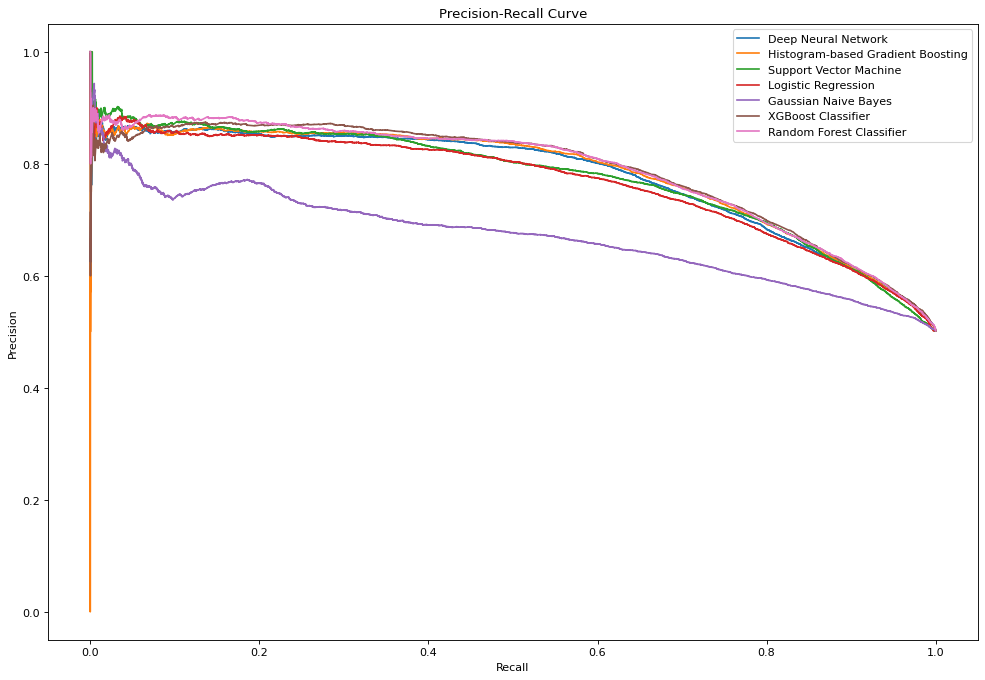

In [106]:
figure(figsize=(15, 10), dpi=80)

fig1 = plt.gcf()
plt.figure(1)

plt.plot(lr_recall_Deep, lr_precision_Deep, label='Deep Neural Network')
plt.plot(lr_recall_HistGradientBoostingClassifier, lr_precision_HistGradientBoostingClassifier, label='Histogram-based Gradient Boosting')
plt.plot(lr_recall_SVM, lr_precision_SVM, label='Support Vector Machine')
plt.plot(lr_recall_LogisticRegression, lr_precision_LogisticRegression, label='Logistic Regression')
plt.plot(lr_recall_GaussianNB, lr_precision_GaussianNB, label='Gaussian Naive Bayes')
plt.plot(lr_recall_XGBClassifier, lr_precision_XGBClassifier, label='XGBoost Classifier')
plt.plot(lr_recall_RandomForestClassifier, lr_precision_RandomForestClassifier, label='Random Forest Classifier')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall Curve')
plt.show()

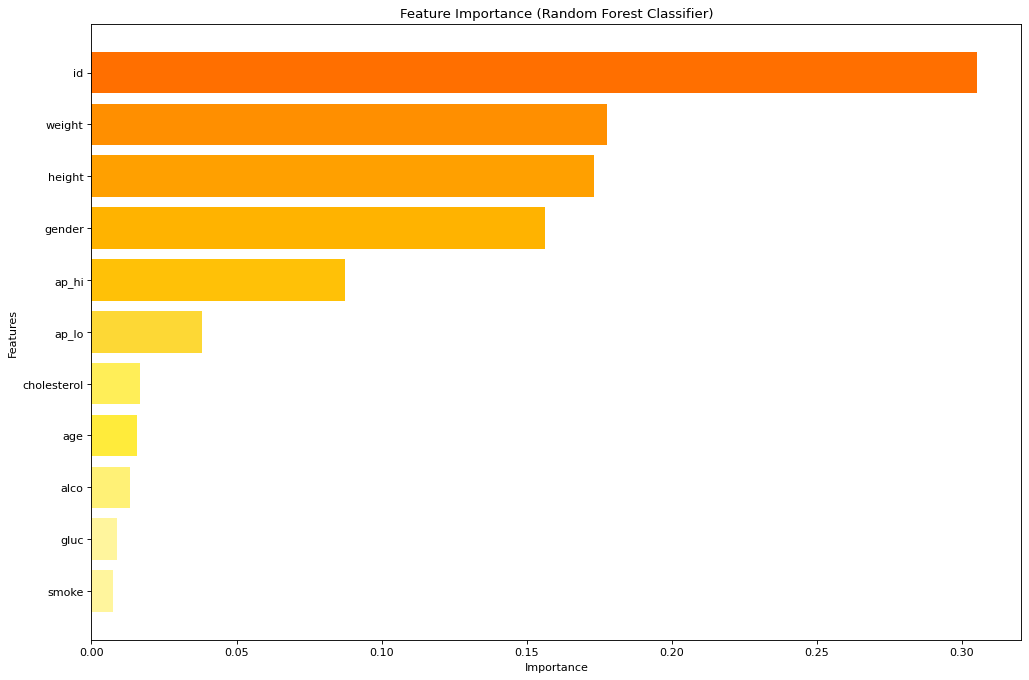

In [107]:
from sklearn.inspection import permutation_importance

a = []
i = 0
for col in df.columns:
    a.append(col)
    i += 1
a.pop()

figure(figsize=(15, 10), dpi=80)
fig1 = plt.gcf()

importances = model_RandomForestClassifier.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance (Random Forest Classifier)')
plt.barh(range(len(indices)), importances[indices],  color=['#FFF59D', '#FFF59D', '#FFF176', '#FFEB3B', '#FFEE58','#FDD835', 
                                                             '#FFC107','#FFB300', '#FFA000', '#FF8F00', '#FF6F00'])
plt.yticks(range(len(indices)), [a[i] for i in indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()